<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/Boosting/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [81]:
df = pd.DataFrame()

In [82]:
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [83]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

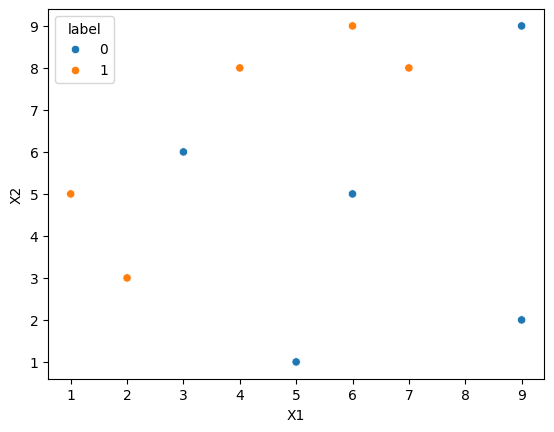

In [84]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [85]:
df['weights'] = 1/df.shape[0]


In [86]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [89]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [90]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [91]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [92]:
# train 1st model
dt1.fit(x, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

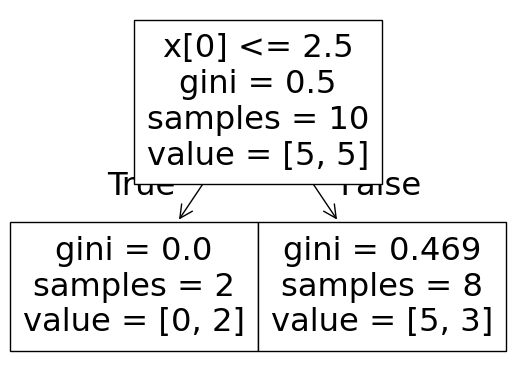

In [93]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

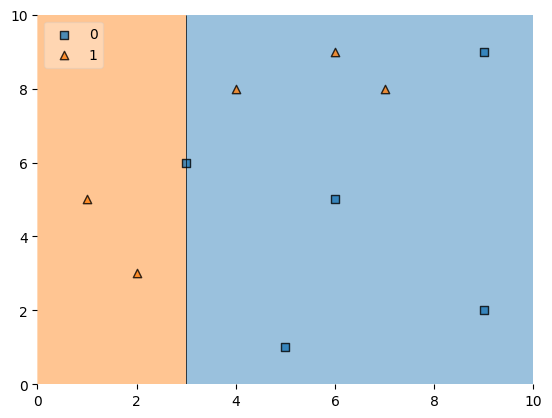

In [94]:
plot_decision_regions(x, y, clf=dt1, legend=2)

In [95]:
df['y_pred'] = dt1.predict(x)

In [96]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [97]:
def calculate_model_weight(error):
  return 0.5 * np.log((1-error)/error)

In [98]:
alpha1 = calculate_model_weight(0.3)

In [99]:
alpha1

np.float64(0.42364893019360184)

In [100]:
# update weights for the correct and wrong classified points

def update_row_weights(row, alpha=0.6931):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [101]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [102]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.050002
1,2,3,1,0.1,1,0.050002
2,3,6,0,0.1,0,0.050002
3,4,8,1,0.1,0,0.199991
4,5,1,0,0.1,0,0.050002
5,6,9,1,0.1,0,0.199991
6,6,5,0,0.1,0,0.050002
7,7,8,1,0.1,0,0.199991
8,9,9,0,0.1,0,0.050002
9,9,2,0,0.1,0,0.050002


In [103]:
df['updated_weights'].sum()

np.float64(0.9499882059173619)

In [104]:
df['normalised_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [105]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.050002,0.052635
1,2,3,1,0.1,1,0.050002,0.052635
2,3,6,0,0.1,0,0.050002,0.052635
3,4,8,1,0.1,0,0.199991,0.210519
4,5,1,0,0.1,0,0.050002,0.052635
5,6,9,1,0.1,0,0.199991,0.210519
6,6,5,0,0.1,0,0.050002,0.052635
7,7,8,1,0.1,0,0.199991,0.210519
8,9,9,0,0.1,0,0.050002,0.052635
9,9,2,0,0.1,0,0.050002,0.052635


In [106]:
df['normalised_weights'].sum()

np.float64(0.9999999999999998)

In [107]:
df['cumsum_upper'] = np.cumsum(df['normalised_weights'])

In [108]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalised_weights']

In [109]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.050002,0.052635,0.052635,0.000000
1,2,3,1,0.1,1,0.050002,0.052635,0.105269,0.052635
2,3,6,0,0.1,0,0.050002,0.052635,0.157904,0.105269
3,4,8,1,0.1,0,0.199991,0.210519,0.368423,0.157904
4,5,1,0,0.1,0,0.050002,0.052635,0.421058,0.368423
5,6,9,1,0.1,0,0.199991,0.210519,0.631577,0.421058
6,6,5,0,0.1,0,0.050002,0.052635,0.684212,0.631577
7,7,8,1,0.1,0,0.199991,0.210519,0.894731,0.684212
8,9,9,0,0.1,0,0.050002,0.052635,0.947365,0.894731
9,9,2,0,0.1,0,0.050002,0.052635,1.000000,0.947365


In [110]:
def create_new_datasets(df):
  indices=[]

  for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [111]:
index_values = create_new_datasets(df)

In [112]:
index_values

[3, 1, 8, 4, 3, 3, 7, 4, 5, 7]

In [113]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]

In [114]:
second_df

,X1,X2,label,weights
3,4,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
7,7,8,1,0.1


In [115]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [116]:
x = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [117]:
dt2.fit(x, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.625, 0.5, '  False')]

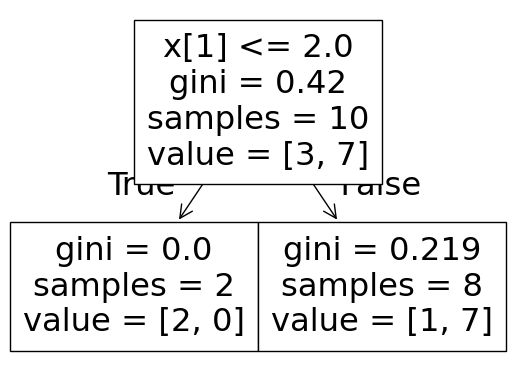

In [118]:
plot_tree(dt2)

<Axes: >

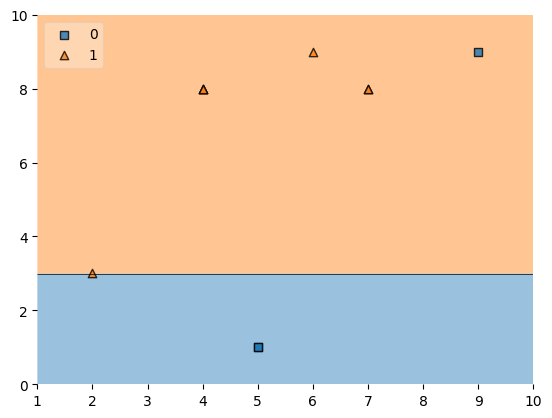

In [119]:
plot_decision_regions(x, y, clf=dt2, legend=2)

In [120]:
second_df['y_pred'] = dt2.predict(x)

In [121]:
second_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,1
4,5,1,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
7,7,8,1,0.1,1


In [122]:
alpha2 = calculate_model_weight(0.1)

In [123]:
alpha2

np.float64(1.0986122886681098)

In [124]:
# update weights
def update_row_weights(row, alpha=1.0986):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [125]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [126]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.033334
1,2,3,1,0.1,1,0.033334
8,9,9,0,0.1,1,0.299996
4,5,1,0,0.1,0,0.033334
3,4,8,1,0.1,1,0.033334
3,4,8,1,0.1,1,0.033334
7,7,8,1,0.1,1,0.033334
4,5,1,0,0.1,0,0.033334
5,6,9,1,0.1,1,0.033334
7,7,8,1,0.1,1,0.033334


In [127]:
second_df['normalised_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [128]:
second_df['normalised_weights'].sum()

np.float64(1.0)

In [129]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalised_weights'])

In [130]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalised_weights']

In [131]:
index_values = create_new_datasets(second_df)

In [132]:
third_df = second_df.iloc[index_values, [0, 1, 2, 3]]

In [133]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
4,5,1,0,0.1


In [134]:
dt3 = DecisionTreeClassifier(max_depth=1)

x = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [135]:
dt3.fit(x, y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

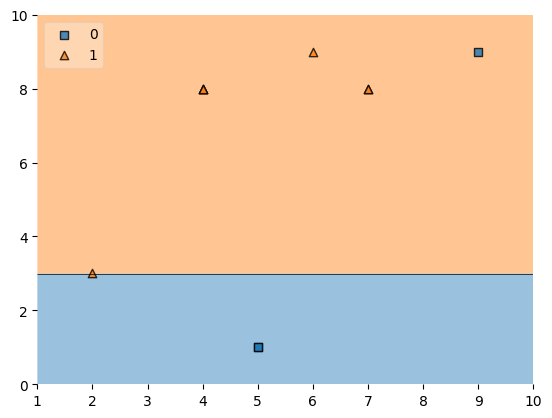

In [136]:
plot_decision_regions(x, y, clf=dt3, legend=2)

In [137]:
third_df['y_pred'] = dt3.predict(x)

In [138]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
4,5,1,0,0.1,0
4,5,1,0,0.1,1
4,5,1,0,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,0
5,6,9,1,0.1,1
4,5,1,0,0.1,1


In [139]:
alpha3 = calculate_model_weight(0.1)

In [140]:
alpha3

np.float64(1.0986122886681098)

In [141]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 1.0986122886681098


In [142]:
query = np.array([1, 5]).reshape(1, 2)
dt1.predict(query)

array([1])

In [143]:
dt2.predict(query)

array([1])

In [144]:
dt3.predict(query)

array([1])

In [145]:
# prediction

alpha1 * 1 + alpha2 * 1 + alpha3 * 1

np.float64(2.6208735075298213)

In [146]:
np.sign(2.6)

np.float64(1.0)